# Árboles de decisión

## Clasificación

Imortamos las librerias que vamos a utilizar

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz as pgv

Generamos un *dataset* a partir de 500 datos aleatorios con 4 diferentes categorias

In [2]:
from sklearn.datasets import make_classification
features, labels= make_classification(n_samples=500, n_features=4, n_informative=3,
                                     n_classes=3,  n_redundant=0,n_clusters_per_class=1, random_state=221)

Definimos los nombres de las columnas de features

In [3]:
features_name=['Feature_01','Feature_02','Feature_03','Feature_04']
features_df=pd.DataFrame(features,columns=features_name)
features_df.head()

,Feature_01,Feature_02,Feature_03,Feature_04
0,1.177387,0.529078,-1.181982,0.327787
1,0.724516,-0.544763,-2.097931,-1.926401
2,-0.254863,1.514730,0.867073,-0.935079
3,1.176090,-0.258155,0.154614,-2.112970
4,0.415526,0.657772,0.865306,-1.296960


Definimos el nombre de la columna de Output

In [4]:
labels_name=['Outcome']
labels_df= pd.DataFrame(labels,columns=labels_name)
labels_df.head()

,Outcome
0,2
1,0
2,1
3,0
4,1


Unimos las colmunas de features y la de outcome

In [5]:
dataset=pd.concat([features_df,labels_df],axis=1, join='inner',sort=False)
dataset.head()

,Feature_01,Feature_02,Feature_03,Feature_04,Outcome
0,1.177387,0.529078,-1.181982,0.327787,2
1,0.724516,-0.544763,-2.097931,-1.926401,0
2,-0.254863,1.514730,0.867073,-0.935079,1
3,1.176090,-0.258155,0.154614,-2.112970,0
4,0.415526,0.657772,0.865306,-1.296960,1


Separamos los datos en una parte de entrenamiento y otra de prueba



In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(features_df,labels_df,test_size=0.2,random_state=221)

In [7]:
x_train_sampled_data = pd.DataFrame(X_train)
y_train_sampled_data = pd.DataFrame(y_train)
x_test_sampled_data  = pd.DataFrame(X_test)
y_test_sampled_data  = pd.DataFrame(y_test)

Definimos el modelo que vamos a utilizar

In [8]:
#Llamamos al modelo 
from sklearn.tree import DecisionTreeClassifier
#LLamamos a métodos para validar el modelo
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics

### Modelo con entropía y 3 capas

In [9]:
clf_ent= DecisionTreeClassifier(criterion='entropy' ,max_depth=3, random_state=221) #max_depth hace referencia 
#de cuantas capas va a tener el árbol

Entrenamos el modelo con los datos de entrenamiento y definimos las predicciones que realiza el modelo, para compararlos con los datos de prueba

In [10]:
clf_ent=clf_ent.fit(x_train_sampled_data,y_train_sampled_data)
yPred=clf_ent.predict(x_test_sampled_data)

Vemos el puntaje del modelo:

In [11]:
scores=cross_val_score(clf_ent,y_test_sampled_data,yPred,cv=10) #cv es el número de veces que se prueba el modelo
print('Puntaje:',metrics.accuracy_score(y_test,yPred)) #Comparamoslas predicciones del modelo con los datos reales
print(scores) #Puntajes finales

Puntaje: 0.85
[0.9 0.8 0.9 0.9 0.9 1.  0.8 0.9 0.6 0.8]


Vemos el árbol de decisión que generamos

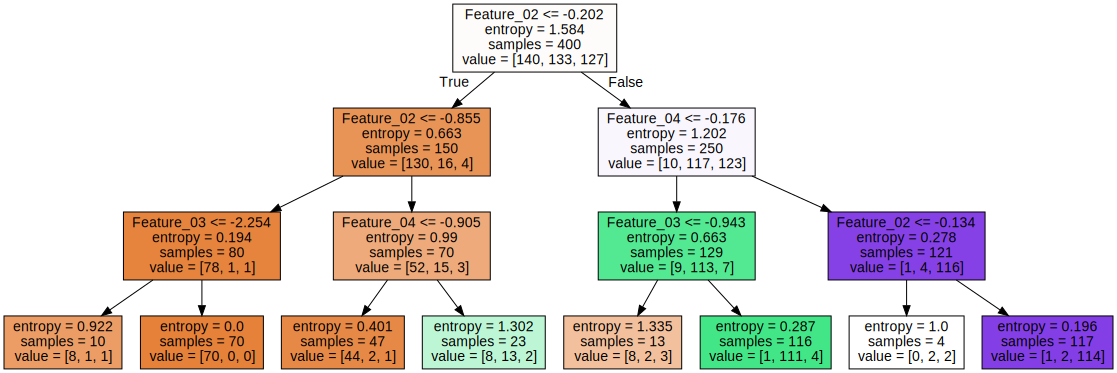

In [12]:
from sklearn import tree
import pydotplus
import graphviz
dot_data = tree.export_graphviz(clf_ent, out_file=None, feature_names=features_name, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('decision_tree.png')
graph = graphviz.Source(dot_data)
graph

### Modelo con entropía y 5 capas

In [13]:
clf_ent5= DecisionTreeClassifier(criterion='entropy',max_depth=5, random_state=221) #max_depth hace referencia de 
#cuantas capas va a tener el árbol

Entrenamos el modelo con los datos de entrenamiento y definimos las predicciones que realiza el modelo, para compararlos con los datos de prueba

In [14]:
clf_ent5=clf_ent5.fit(x_train_sampled_data,y_train_sampled_data)
yPred=clf_ent5.predict(x_test_sampled_data)

Vemos el puntaje del modelo:

In [15]:
scores=cross_val_score(clf_ent5,y_test_sampled_data,yPred,cv=10) #cv es el número de veces que se prueba el modelo
print('Puntaje:',metrics.accuracy_score(y_test,yPred)) #Comparamoslas predicciones del modelo con los datos reales
print(scores) #Puntajes finales

Puntaje: 0.87
[0.9 0.9 0.8 0.8 1.  0.9 0.9 0.9 0.7 0.9]


Vemos el árbol de decisión que generamos

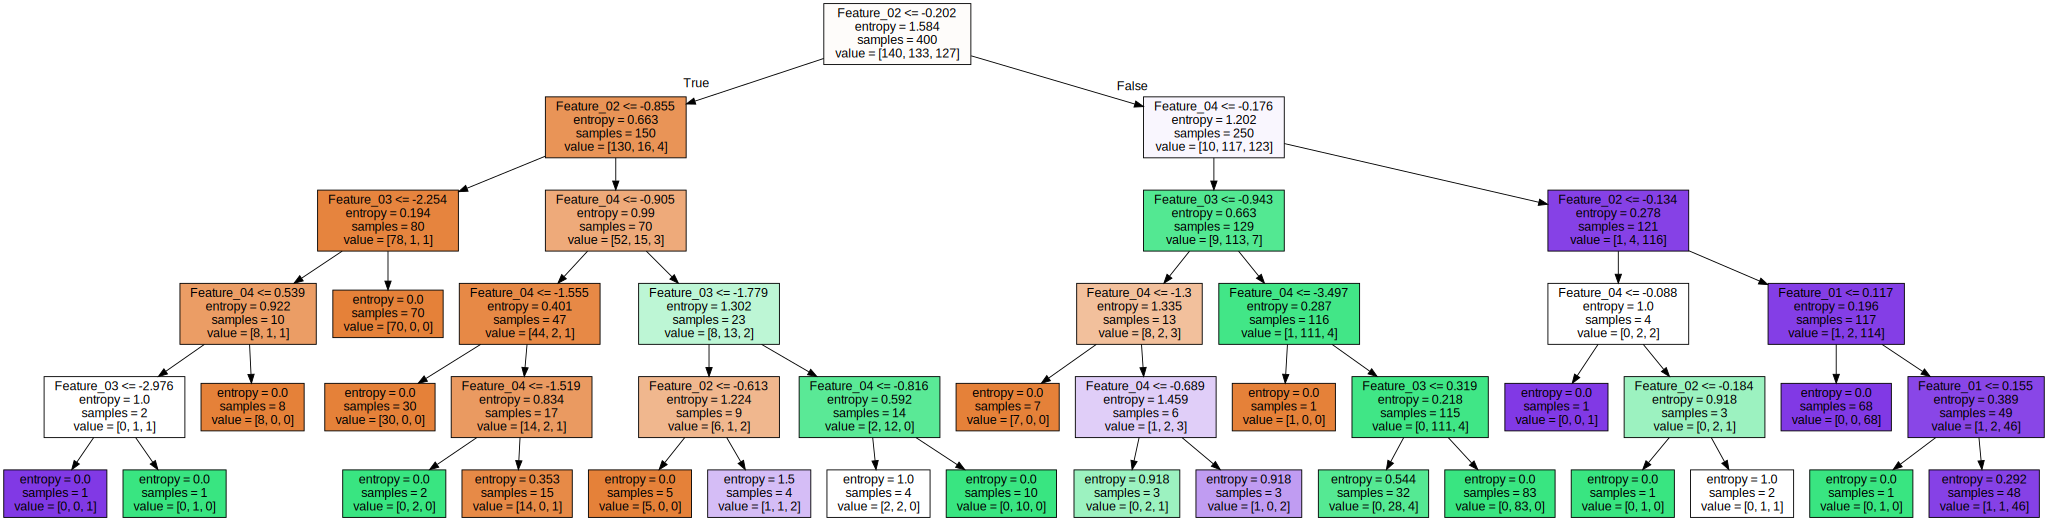

In [16]:
from sklearn import tree
import pydotplus
import graphviz
dot_data = tree.export_graphviz(clf_ent5, out_file=None, feature_names=features_name, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.set_size('"5,5!')
graph.write_png('decision_tree.png')
graph = graphviz.Source(dot_data)
graph

La cantidad de capas ayuda a que aumente la precisión del modelo o disminuya si sucede el *overfitting*, como se observa del pasar de 5 a 10 capas

### Modelo con entropía y 10 capas

Entrenamos el modelo con los datos de entrenamiento y definimos las predicciones que realiza el modelo, para compararlos con los datos de prueba

In [17]:
clf_ent10= DecisionTreeClassifier(criterion='entropy' ,max_depth=10, random_state=221) #max_depth hace referencia de 
#cuantas capas va a tener el árbol

In [18]:
clf_ent10=clf_ent10.fit(x_train_sampled_data,y_train_sampled_data)
yPred=clf_ent10.predict(x_test_sampled_data)

Vemos el puntaje del modelo:

In [19]:
scores=cross_val_score(clf_ent10,y_test_sampled_data,yPred,cv=10) #cv es el número de veces que se prueba el modelo
print('Puntaje:',metrics.accuracy_score(y_test,yPred)) #Comparamoslas predicciones del modelo con los datos reales
print(scores) #fPuntajes finales

Puntaje: 0.85
[1.  0.8 0.8 0.8 1.  0.8 0.9 0.8 0.8 0.8]


Vemos el árbol de decisión que generamos

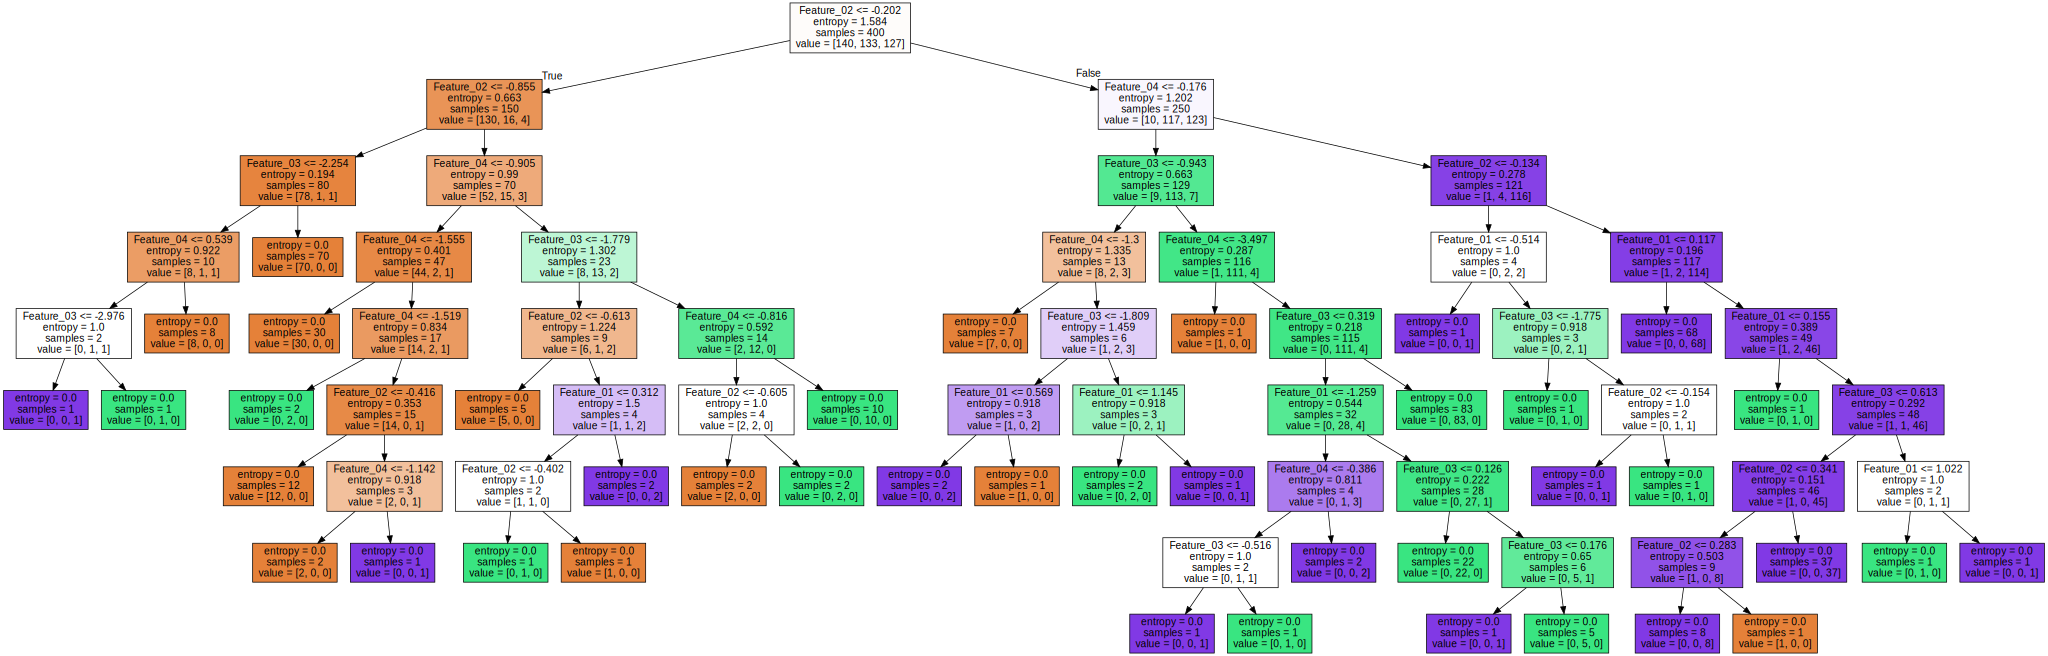

In [20]:
from sklearn import tree
import pydotplus
import graphviz
dot_data = tree.export_graphviz(clf_ent10, out_file=None, feature_names=features_name,filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.set_size('"5,5!')
graph.write_png('decision_tree.png')
graph = graphviz.Source(dot_data)
graph

### Modelo con gini y 3 capas

In [21]:
clf_gini3= DecisionTreeClassifier(criterion='gini' ,max_depth=3, random_state=221) #max_depth hace referencia de 
#cuantas capas va a tener el árbol

Entrenamos el modelo con los datos de entrenamiento y definimos las predicciones que realiza el modelo, para compararlos con los datos de prueba

In [22]:
clf_gini3=clf_gini3.fit(x_train_sampled_data,y_train_sampled_data)
yPred=clf_gini3.predict(x_test_sampled_data)

Vemos el puntaje del modelo:

In [23]:
scores=cross_val_score(clf_gini3,y_test_sampled_data,yPred,cv=10) #cv es el número de veces que se prueba el modelo
print('Puntaje:',metrics.accuracy_score(y_test,yPred)) #Comparamoslas predicciones del modelo con los datos reales
print(scores) #fPuntajes finales

Puntaje: 0.85
[0.9 0.8 0.9 0.9 0.9 1.  0.8 0.9 0.6 0.8]


Vemos el árbol de decisión que generamos

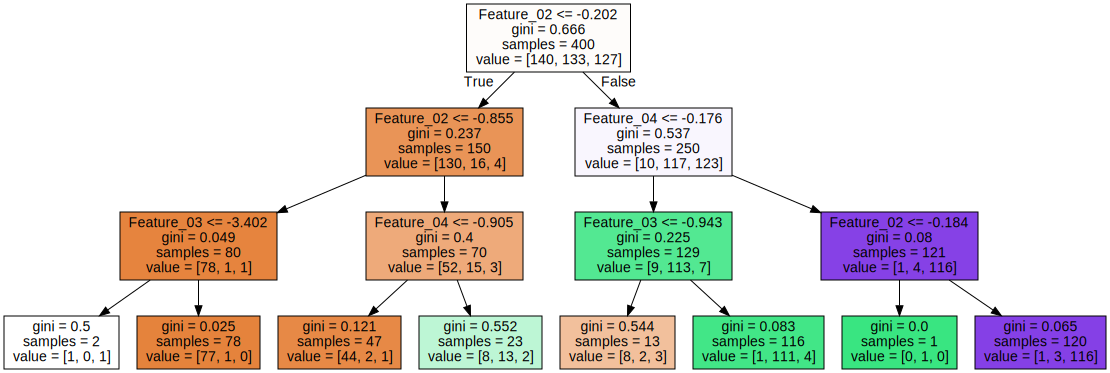

In [24]:
from sklearn import tree
import pydotplus
import graphviz
dot_data = tree.export_graphviz(clf_gini3, out_file=None, feature_names=features_name, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.set_size('"5,5!')
graph.write_png('decision_tree.png')
graph = graphviz.Source(dot_data)
graph

### Modelo con gini y 5 capas

In [25]:
clf_gini5= DecisionTreeClassifier(criterion='gini' ,max_depth=5, random_state=221) #max_depth hace referencia de 
#cuantas capas va a tener el árbol

Entrenamos el modelo con los datos de entrenamiento y definimos las predicciones que realiza el modelo, para compararlos con los datos de prueba

In [26]:
clf_gini5=clf_gini5.fit(x_train_sampled_data,y_train_sampled_data)
yPred=clf_gini5.predict(x_test_sampled_data)

Vemos el puntaje del modelo:

In [27]:
scores=cross_val_score(clf_gini5,y_test_sampled_data,yPred,cv=10) #cv es el número de veces que se prueba el modelo
print('Puntaje:',metrics.accuracy_score(y_test,yPred)) #Comparamoslas predicciones del modelo con los datos reales
print(scores) #fPuntajes finales

Puntaje: 0.91
[0.9 0.9 0.9 0.9 0.9 1.  0.8 1.  0.9 0.9]


Vemos el árbol de decisión que generamos

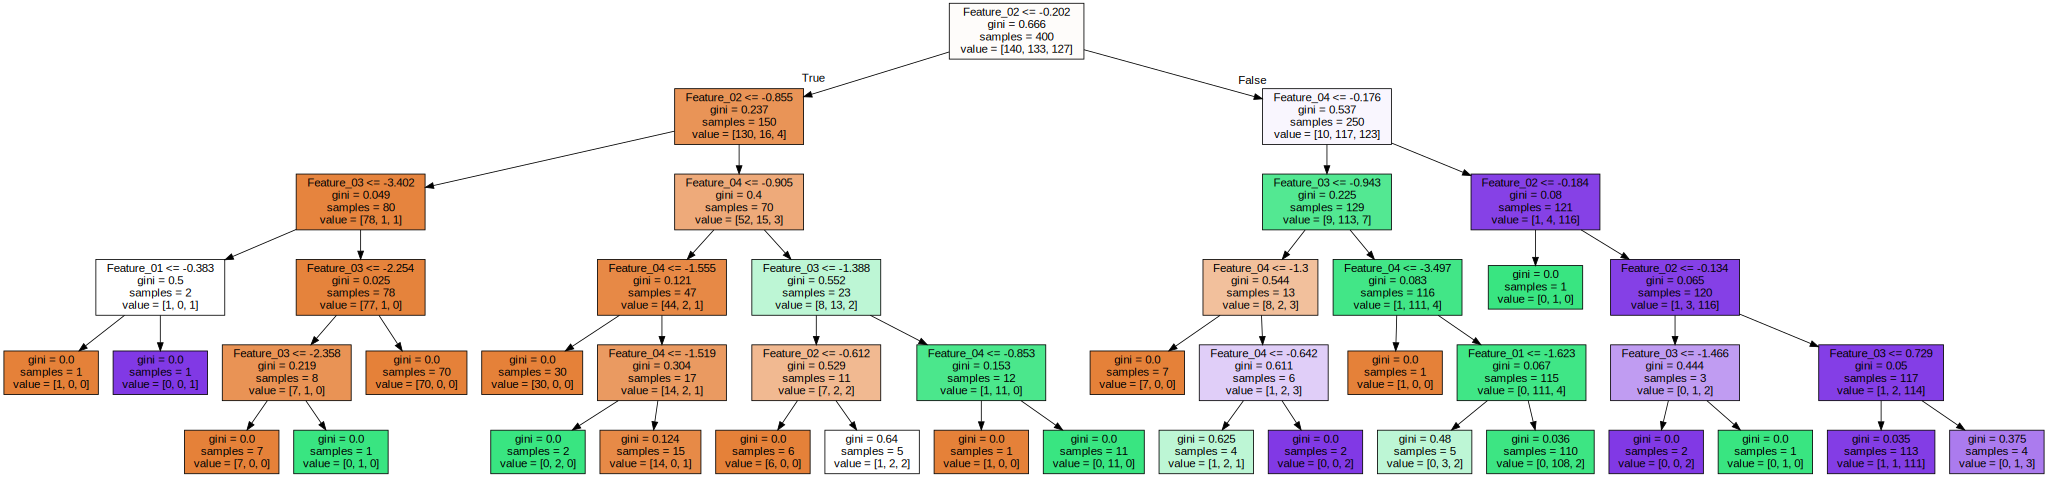

In [28]:
from sklearn import tree
import pydotplus
import graphviz
dot_data = tree.export_graphviz(clf_gini5, out_file=None, feature_names=features_name,filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.set_size('"5,5!')
graph.write_png('decision_tree.png')
graph = graphviz.Source(dot_data)
graph

## Regresión


In [29]:
#Llamamos al modelo 
from sklearn.tree import DecisionTreeRegressor
#LLamamos a métodos para validar el modelo
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics

In [30]:
reg_sq= DecisionTreeRegressor(criterion='squared_error', max_depth=3) #max_depth hace referencia de cuantas capas va a tener
#el árbol

Entrenamos el modelo con los datos de entrenamiento y definimos las predicciones que realiza el modelo, para compararlos con los datos de prueba

In [31]:
reg_sq=reg_sq.fit(x_train_sampled_data,y_train_sampled_data)
yPred=reg_sq.predict(x_test_sampled_data)

Vemos los puntajes del modelo:

In [32]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mse= mean_squared_error(y_test, yPred)
mae=mean_absolute_error(y_test, yPred)
rmse=np.sqrt(mean_squared_error(y_test, yPred))
r_sq=r2_score(y_test, yPred)
print(f"""error medio cuadrático: {mse}\nmean absolute error: {mae}\nraiz error medio cuadrático: {rmse}
      R cuadrado: {r_sq}""")

error medio cuadrático: 0.1565044307562773
mean absolute error: 0.204717265871958
raiz error medio cuadrático: 0.3956064088918142
      R cuadrado: 0.7529917443871886


Vemos el árbol de decisión que generamos

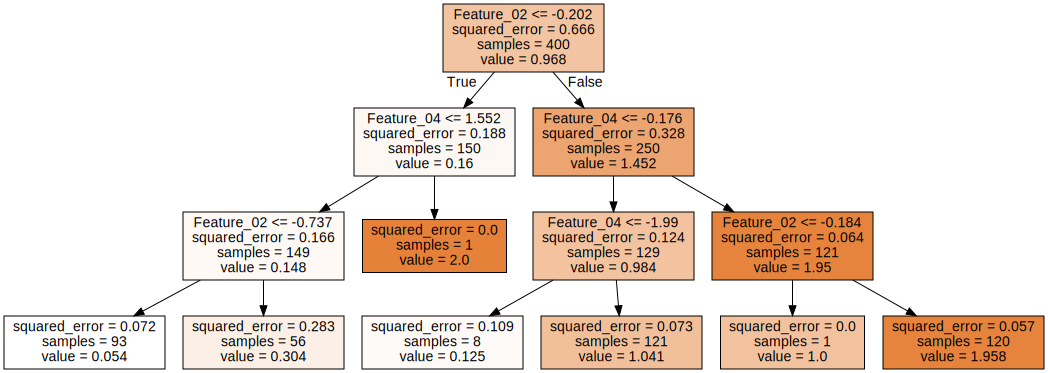

In [33]:
from sklearn import tree
dot_data=tree.export_graphviz(reg_sq, out_file=None, feature_names=features_name,filled=True)
graph=pydotplus.graph_from_dot_data(dot_data)
graph.set_size('"5,5!')
graph.write_png('regression_tree.png')
graph = graphviz.Source(dot_data)
graph

## Random Forest

In [34]:
#Llamamos al modelo 
from sklearn.ensemble import RandomForestClassifier
#LLamamos a métodos para validar el modelo
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics

In [35]:
rf_ent= RandomForestClassifier(criterion='entropy', max_depth=4,random_state=221) #max_depth hace referencia de 
#cuantas capas va a tener el bosque

Entrenamos el modelo con los datos de entrenamiento y definimos las predicciones que realiza el modelo, para compararlos con los datos de prueba

In [36]:
rf_ent=rf_ent.fit(x_train_sampled_data,y_train_sampled_data)
yPred=rf_ent.predict(x_test_sampled_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


Vemos el puntaje del modelo:

In [37]:
scores=cross_val_score(rf_ent,y_test_sampled_data,yPred,cv=10) #cv es el número de veces que se prueba el modelo
print('Puntaje:',metrics.accuracy_score(y_test,yPred)) #Comparamoslas predicciones del modelo con los datos reales
print(scores) #Puntajes finales

Puntaje: 0.91
[0.9 1.  0.9 1.  1.  0.9 0.8 1.  0.9 0.7]


Para ver el bosque que generamos primero vamos a ver a un unico arbol

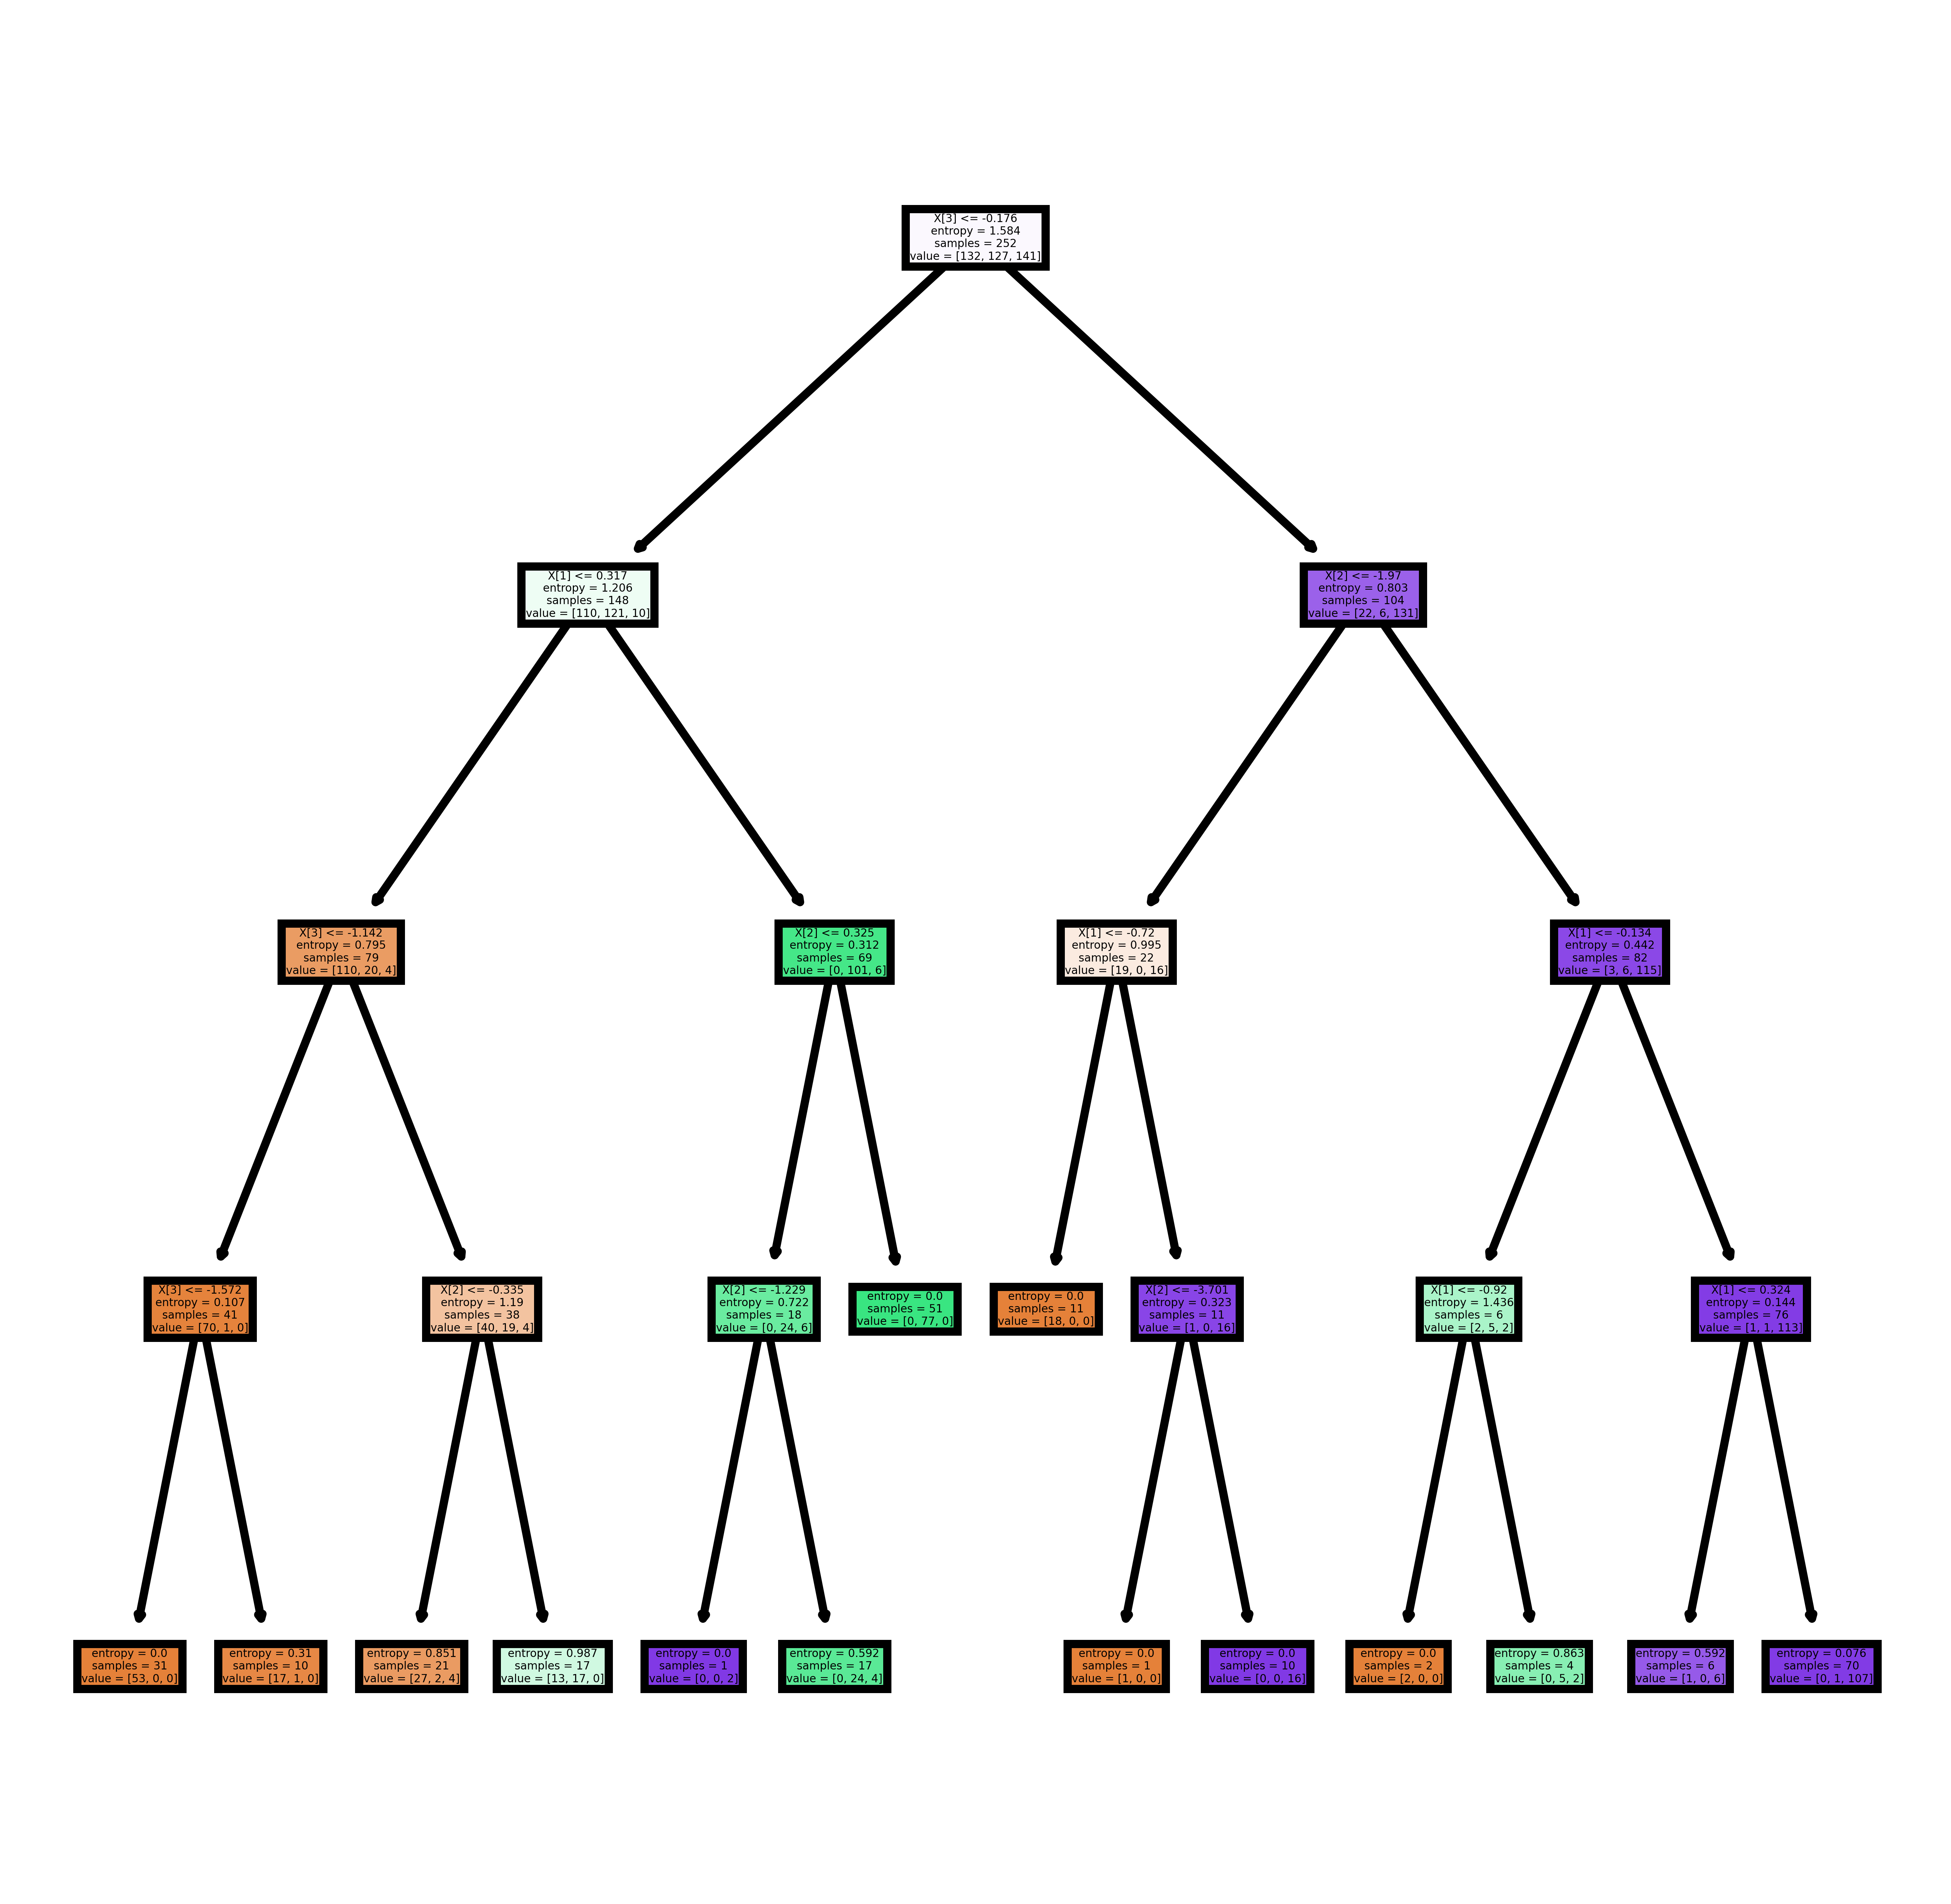

In [38]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=1800)
tree.plot_tree(rf_ent.estimators_[0], filled = True)
fig.savefig('rf_individualtree.png')

Ahora si veremos cinco árboles de decisión que conforman una parte pequeña del total del bosque

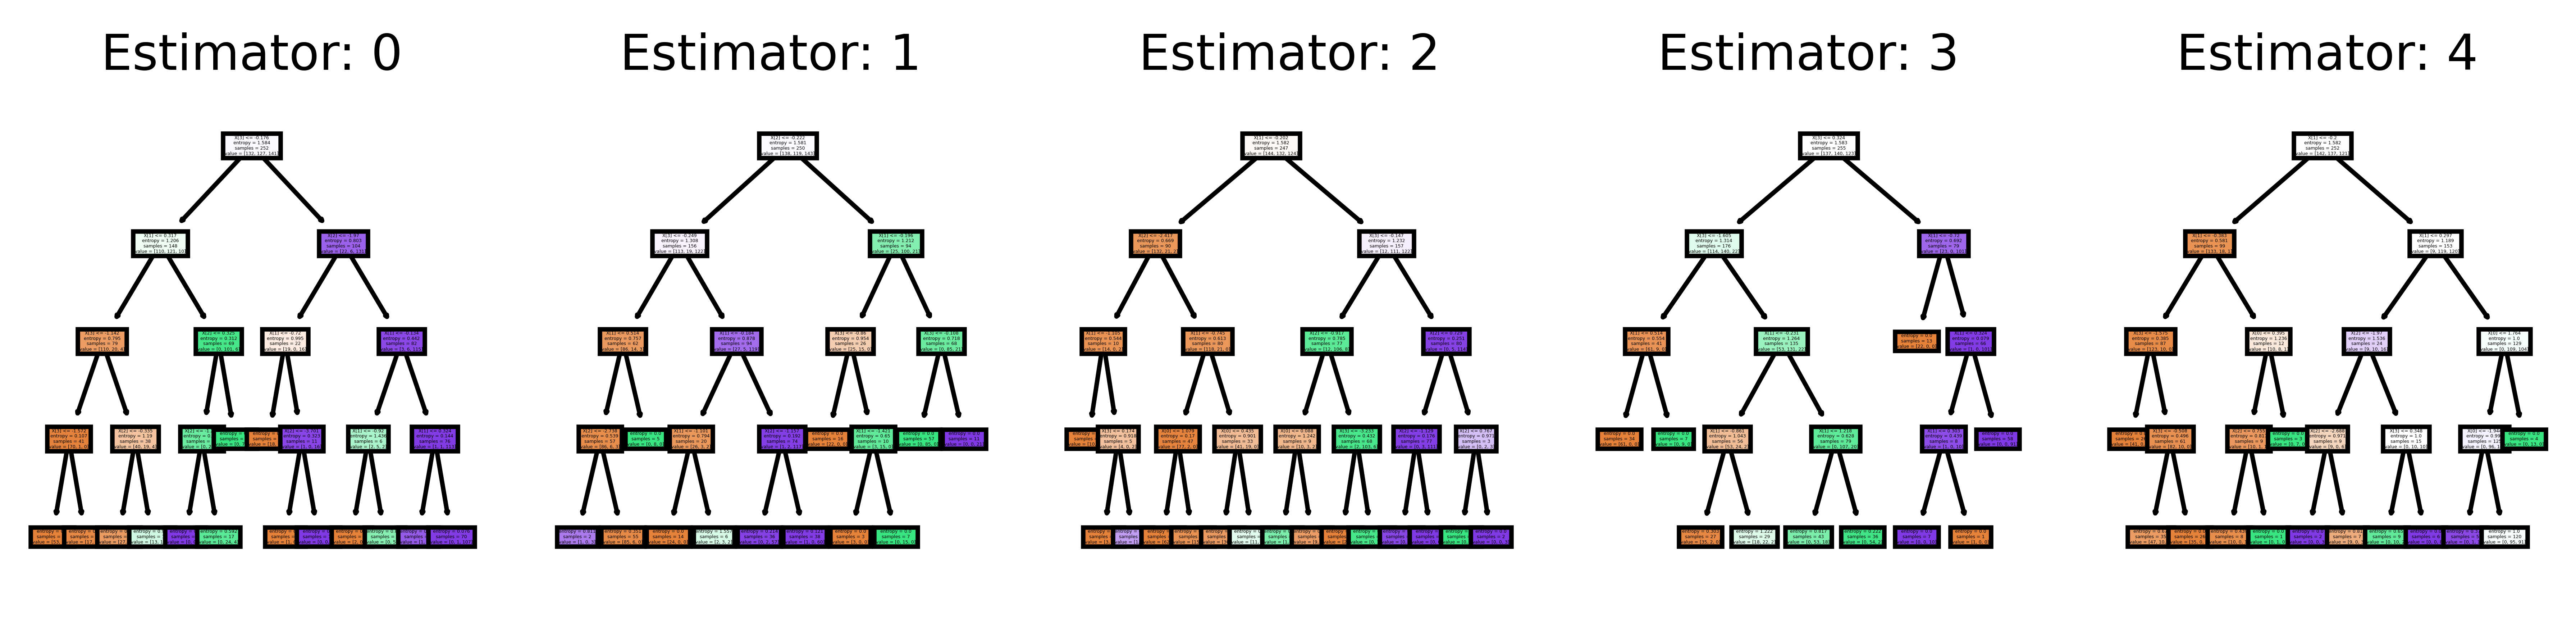

In [39]:
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    tree.plot_tree(rf_ent.estimators_[index], filled = True, ax = axes[index])
    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('rf_5trees.png')